In [1]:
import io
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles (2).csv


In [2]:
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['netflix_titles (2).csv']))

In [ ]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [3]:
print(df['description'][0])

As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.shape

(8807, 12)

In [3]:
# Let's import essential libraries:

import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import itertools
from sklearn.model_selection import KFold
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from gensim.models import Word2Vec
from tensorflow.keras.utils import Sequence
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# Data Analytics)
1- Calculate the average number of seasons of TV shows across genres?

In [ ]:
# Filter only TV shows
df_tv_shows = df[df['type'] == 'TV Show']

# Extract the number of seasons from the duration column
df_tv_shows['seasons'] = df_tv_shows['duration'].str.extract('(\d+)').astype(int)

# Split the listed_in column into multiple genres and explode to separate rows for each genre
df_tv_shows['genres'] = df_tv_shows['listed_in'].str.split(', ')
df_tv_shows = df_tv_shows.explode('genres')

# Group by genres and calculate the average number of seasons
average_seasons_per_genre = df_tv_shows.groupby('genres')['seasons'].mean()

print(average_seasons_per_genre)


genres
Anime Series                    1.573864
British TV Shows                1.818182
Classic & Cult TV               5.678571
Crime TV Shows                  1.708511
Docuseries                      1.336709
International TV Shows          1.410067
Kids' TV                        1.977827
Korean TV Shows                 1.264901
Reality TV                      1.552941
Romantic TV Shows               1.397297
Science & Nature TV             1.293478
Spanish-Language TV Shows       1.540230
Stand-Up Comedy & Talk Shows    1.839286
TV Action & Adventure           2.398810
TV Comedies                     2.151463
TV Dramas                       1.850590
TV Horror                       2.106667
TV Mysteries                    2.193878
TV Sci-Fi & Fantasy             2.654762
TV Shows                        1.000000
TV Thrillers                    2.052632
Teen TV Shows                   2.246377
Name: seasons, dtype: float64


<ipython-input-3-8cd0acc5edfb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv_shows['seasons'] = df_tv_shows['duration'].str.extract('(\d+)').astype(int)
<ipython-input-3-8cd0acc5edfb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv_shows['genres'] = df_tv_shows['listed_in'].str.split(', ')


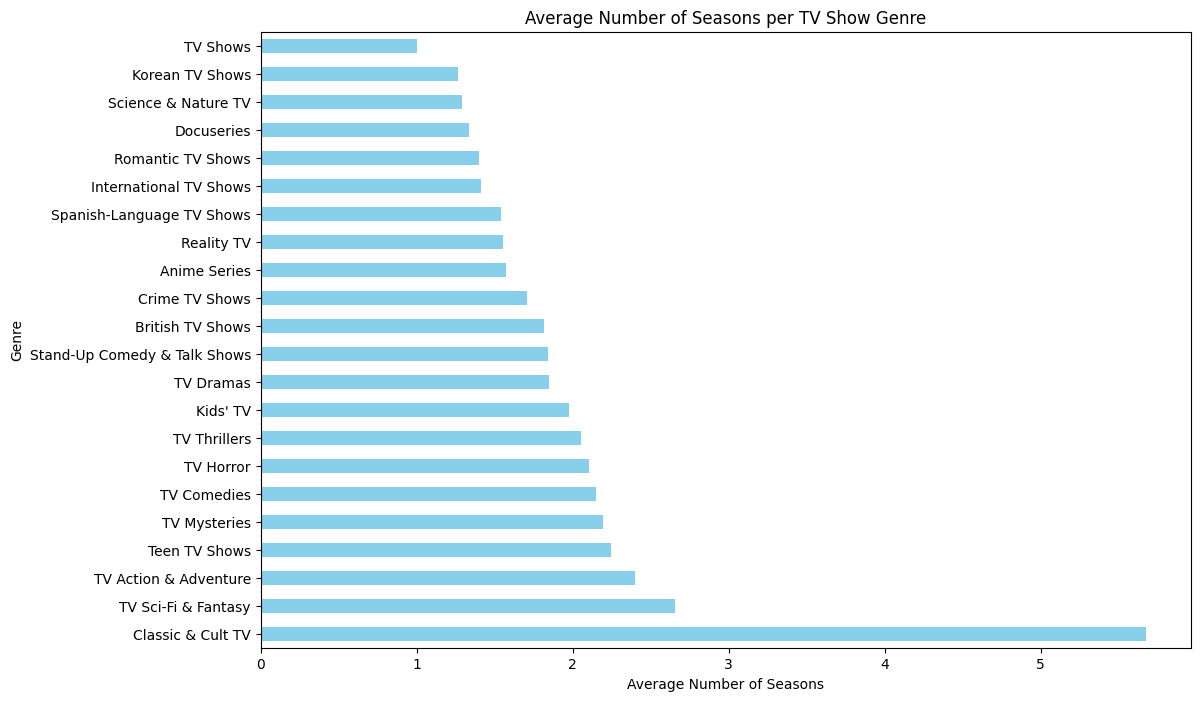

In [ ]:
# Let's visualize it:

import matplotlib.pyplot as plt
average_seasons_per_genre = average_seasons_per_genre.sort_values()

# Plot the data
plt.figure(figsize = (12, 8))
average_seasons_per_genre.plot(kind = 'barh', color = 'skyblue')
plt.title('Average Number of Seasons per TV Show Genre')
plt.xlabel('Average Number of Seasons')
plt.ylabel('Genre')
plt.gca().invert_yaxis() 
plt.show()

2- Find the top directors & actors based on the number of movies

In [5]:
# Filter only movies
df_movies = df[df['type'] == 'Movie']

# Count the number of movies for each director
top_directors = df_movies['director'].value_counts()

# Count the number of movies for each actor
# First, split the 'cast' column into a list of actors
df_movies['actors'] = df_movies['cast'].str.split(', ')
# Explode the list into separate rows
df_actors = df_movies.explode('actors')
# Count the number of movies for each actor
top_actors = df_actors['actors'].value_counts()

# Display the top directors and actors
print("Top Directors:")
print(top_directors)
print("\nTop Actors:")
print(top_actors)

Top Directors:
director
Rajiv Chilaka                 19
Raúl Campos, Jan Suter        18
Suhas Kadav                   16
Marcus Raboy                  15
Jay Karas                     14
                              ..
Dennis Rovira van Boekholt     1
Naoto Amazutsumi               1
Jenny Gage                     1
Kaila York                     1
Mozez Singh                    1
Name: count, Length: 4354, dtype: int64

Top Actors:
actors
Anupam Kher              42
Shah Rukh Khan           35
Naseeruddin Shah         32
Akshay Kumar             30
Om Puri                  30
                         ..
Sushma Bakshi             1
Yusuf Hussain             1
Amarjeet Amle             1
Priya                     1
Chittaranjan Tripathy     1
Name: count, Length: 25951, dtype: int64


<ipython-input-5-f1d176727da1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['actors'] = df_movies['cast'].str.split(', ')


<ipython-input-6-67a1904f8746>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Number of Movies', y = 'Director', data = top_directors_df, palette = 'coolwarm')


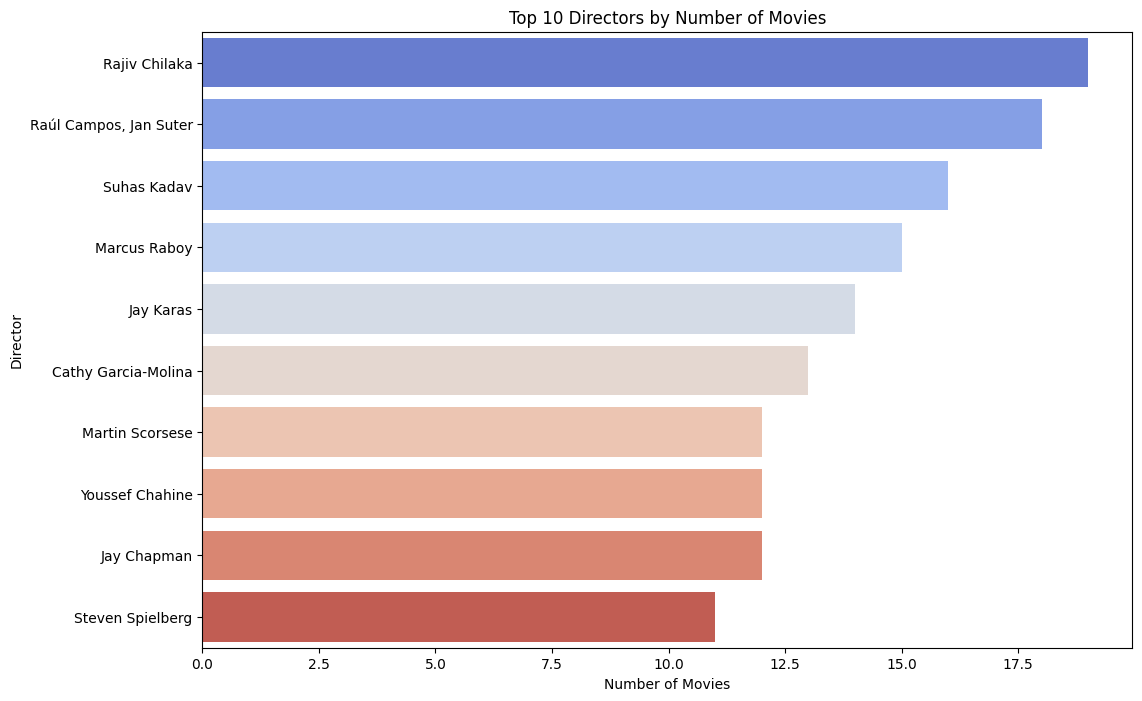

<ipython-input-6-67a1904f8746>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Number of Movies', y = 'Actor', data = top_actors_df, palette = 'viridis')


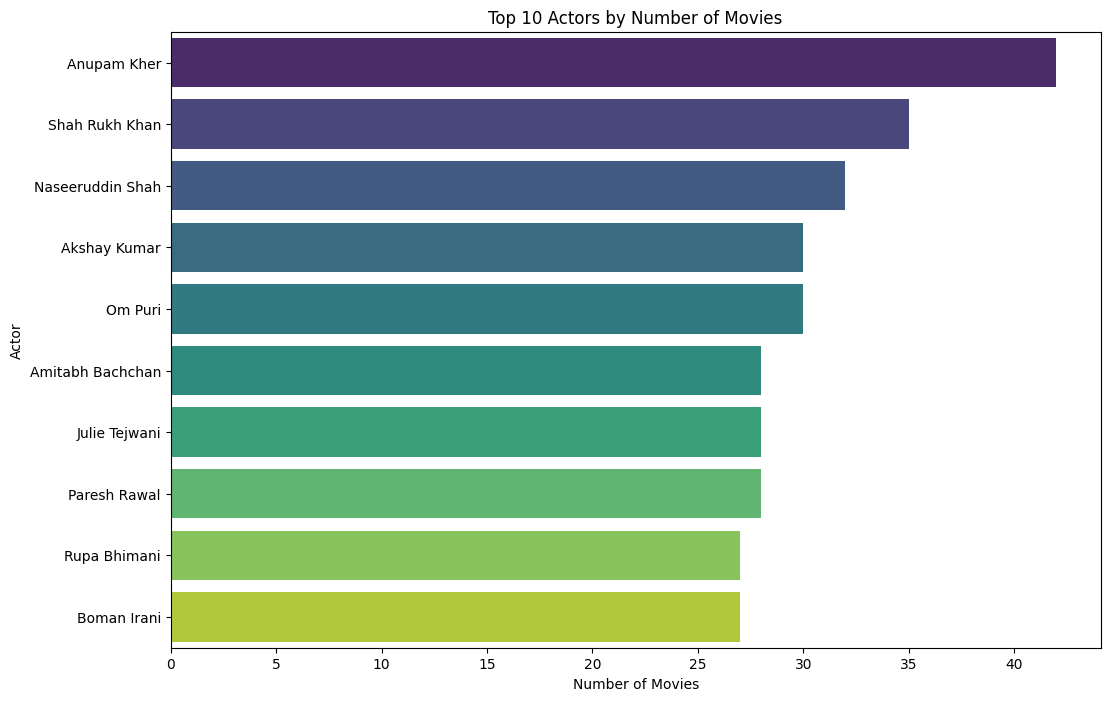

In [6]:
# Visualization:

top_directors_df = pd.DataFrame(top_directors.head(10)).reset_index()
top_directors_df.columns = ['Director', 'Number of Movies']
# Plot top 10 directors
plt.figure(figsize = (12, 8))
sns.barplot(x = 'Number of Movies', y = 'Director', data = top_directors_df, palette = 'coolwarm')
plt.title('Top 10 Directors by Number of Movies')
plt.show()


top_actors_df = pd.DataFrame(top_actors.head(10)).reset_index()
top_actors_df.columns = ['Actor', 'Number of Movies']
# Plot top 10 actors
plt.figure(figsize = (12, 8))
sns.barplot(x = 'Number of Movies', y = 'Actor', data = top_actors_df, palette = 'viridis')
plt.title('Top 10 Actors by Number of Movies')
plt.show()


In [ ]:
print(df['type'].unique())

['Movie' 'TV Show']


3- Derive of versatility of a movie - TV show by counting no. of genres

In [ ]:
versatility_of_movies = df.groupby('type')['listed_in'].count()
print(versatility_of_movies)

type
Movie      6131
TV Show    2676
Name: listed_in, dtype: int64


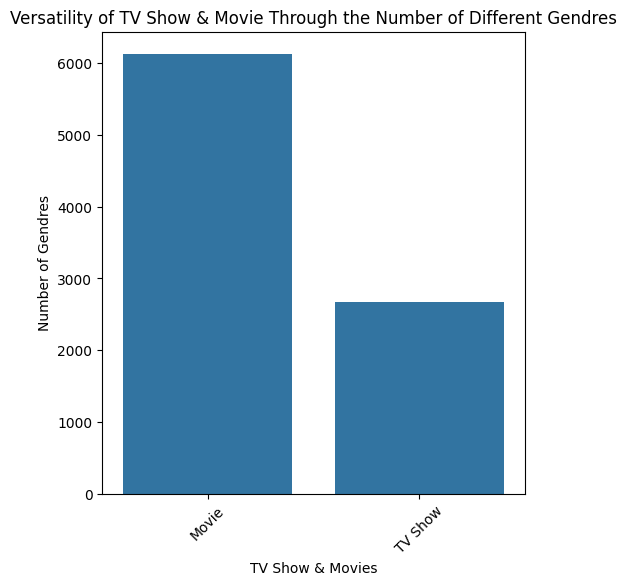

In [ ]:
# Visualize the result:

plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x = versatility_of_movies.index, y = versatility_of_movies.values)
plt.xlabel('TV Show & Movies')
plt.ylabel('Number of Gendres')
plt.title('Versatility of TV Show & Movie Through the Number of Different Gendres')
plt.xticks(rotation = 45)
plt.show()


In [ ]:
print(df['release_year'].unique())

[2020 2021 1993 2018 1996 1998 1997 2010 2013 2017 1975 1978 1983 1987
 2012 2001 2014 2002 2003 2004 2011 2008 2009 2007 2005 2006 1994 2015
 2019 2016 1982 1989 1990 1991 1999 1986 1992 1984 1980 1961 2000 1995
 1985 1976 1959 1988 1981 1972 1964 1945 1954 1979 1958 1956 1963 1970
 1973 1925 1974 1960 1966 1971 1962 1969 1977 1967 1968 1965 1946 1942
 1955 1944 1947 1943]


In [ ]:
print(df['release_year'].nunique())

74


4- Categorize release years into decades of release

In [3]:
# Create a new column for the decade
df['decade'] = (df['release_year'] // 10) * 10

# Display the modified DataFrame
print(df['decade'].head(5))

0    2020
1    2020
2    2020
3    2020
4    2020
Name: decade, dtype: int64


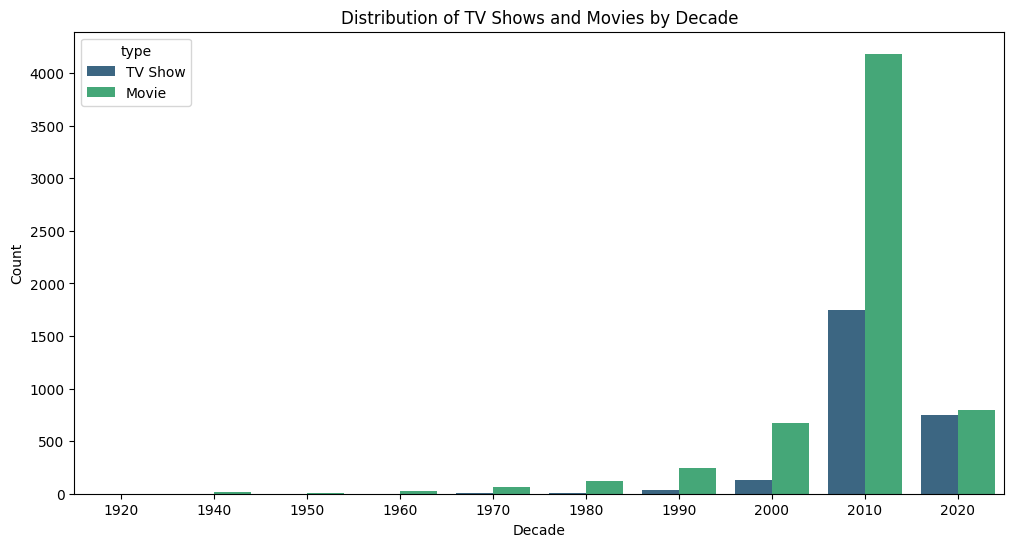

In [ ]:
# Let's visualize it:

plt.figure(figsize = (12, 6))
sns.countplot(data = df, x = 'decade', hue = 'type', palette = 'viridis')
plt.title('Distribution of TV Shows and Movies by Decade')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.show()

5- Distribution of movies & TV shows across genres

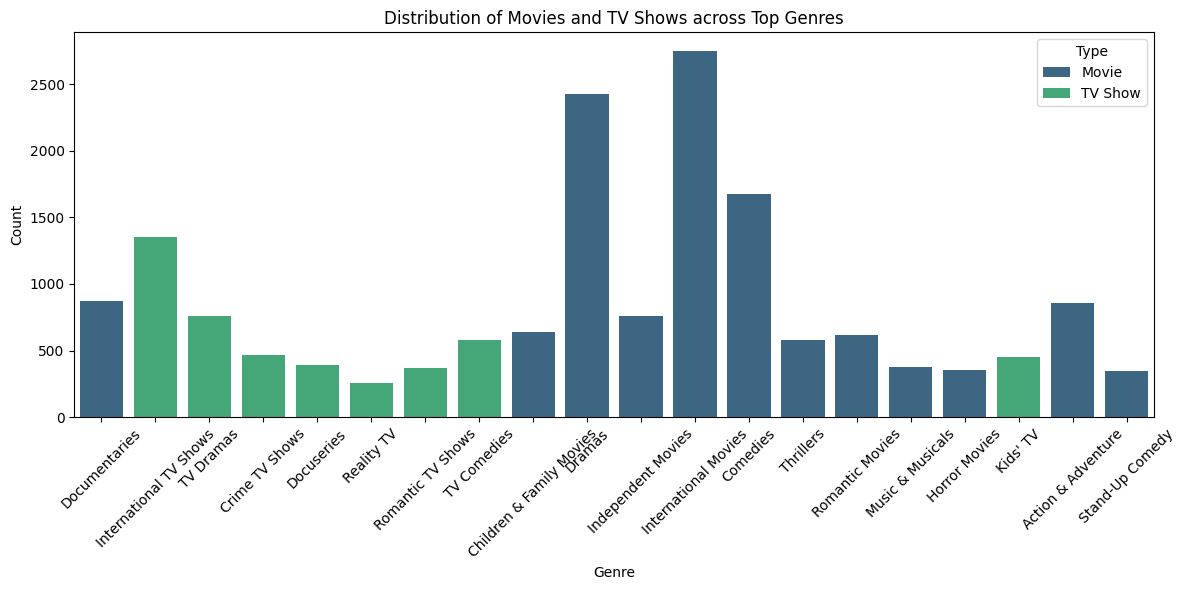

In [ ]:
# Split the 'listed_in' column by genres and explode the DataFrame

df['listed_in'] = df['listed_in'].fillna('')
data_genre = df.assign(genre = df['listed_in'].str.split(',')).explode('genre')
data_genre['genre'] = data_genre['genre'].str.strip()

# Calculate top genres by count to limit visualization
top_genres = data_genre['genre'].value_counts().head(20).index

# Filter data for only top genres
data_genre_top = data_genre[data_genre['genre'].isin(top_genres)]

# Plotting the count of movies and TV shows across top genres
plt.figure(figsize = (12, 6))
sns.countplot(data = data_genre_top, x = 'genre', hue = 'type', palette = 'viridis')
plt.title('Distribution of Movies and TV Shows across Top Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.legend(title = 'Type')
plt.tight_layout()
plt.show()

6- Distribution of movies & TV shows across release year

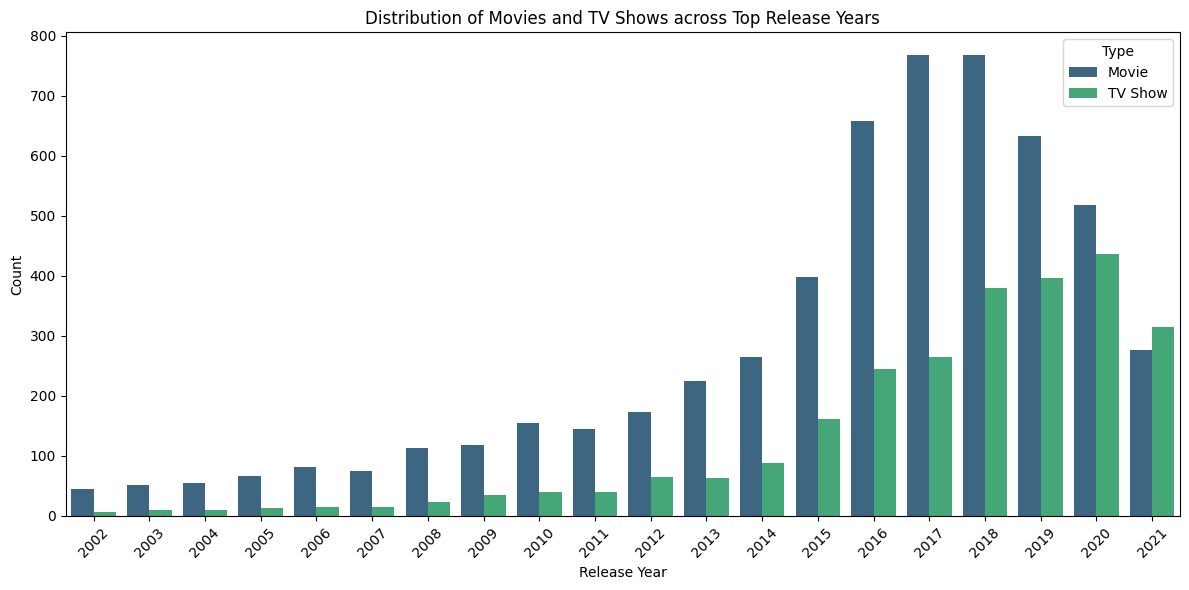

In [ ]:
# Calculate top release years by count to limit visualization
top_release_years = df['release_year'].value_counts().head(20).index

# Filter data for only top release years
df_top_years = df[df['release_year'].isin(top_release_years)]

# Plotting the count of movies and TV shows across top release years
plt.figure(figsize = (12, 6))
sns.countplot(data = df_top_years, x = 'release_year', hue = 'type', palette = 'viridis')
plt.title('Distribution of Movies and TV Shows across Top Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.legend(title = 'Type')
plt.tight_layout()
plt.show()

In [ ]:
print(df['listed_in'].nunique())

514


In [4]:
# As we can see the unique values of listed_in column is very high (514). In this step, I am going to reduce 514 values. First, extract all individual genres 
# from the listed_in column: 

# Extract unique individual genres
unique_genres = set()
for genres in df['listed_in']:
    unique_genres.update(genres.split(','))

print(unique_genres)


{' Sci-Fi & Fantasy', 'TV Comedies', 'International Movies', ' Anime Features', 'Sci-Fi & Fantasy', 'Movies', 'Stand-Up Comedy & Talk Shows', 'Cult Movies', " Kids' TV", ' Cult Movies', ' Independent Movies', 'Classic Movies', 'TV Shows', 'Stand-Up Comedy', 'Classic & Cult TV', ' Science & Nature TV', 'British TV Shows', 'Sports Movies', ' Crime TV Shows', ' International Movies', ' TV Comedies', ' Classic Movies', ' Classic & Cult TV', ' Spanish-Language TV Shows', 'International TV Shows', 'Romantic TV Shows', 'TV Horror', ' Comedies', 'Comedies', 'Horror Movies', ' Dramas', 'Action & Adventure', ' Sports Movies', ' TV Dramas', ' TV Thrillers', ' Reality TV', 'Romantic Movies', ' Docuseries', ' Korean TV Shows', 'Reality TV', 'Thrillers', ' Teen TV Shows', 'Spanish-Language TV Shows', 'Independent Movies', ' Horror Movies', 'Dramas', ' Documentaries', ' Faith & Spirituality', 'Anime Series', 'TV Dramas', 'Documentaries', "Kids' TV", ' Romantic Movies', ' Children & Family Movies', 'T

In [ ]:
print(len(unique_genres)) # It is reduced from 514 to 42.

42


In [5]:
# Define custom mapping from specific genres to broader categories

genre_mapping = {
    'TV Sci-Fi & Fantasy': 'Sci-Fi & Fantasy',
    'Documentaries': 'Docuseries',
    'TV Thrillers': 'Thriller',
    'Classic & Cult TV': 'Other',
    'Dramas': 'Drama',
    'Korean TV Shows': 'Other',
    'Science & Nature TV': 'Docuseries',
    'Horror Movies': 'Horror',
    'Docuseries': 'Docuseries',
    'Spanish-Language TV Shows': 'Other',
    'Thrillers': 'Thriller',
    'Stand-Up Comedy & Talk Shows': 'Comedy',
    'Movies': 'Other',
    'TV Shows': 'Other',
    'TV Action & Adventure': 'Action & Adventure',
    'Romantic Movies': 'Romance',
    'Romantic TV Shows': 'Romance',
    'Independent Movies': 'Other',
    'TV Mysteries': 'Mystery',
    'Anime Features': 'Animation',
    'Faith & Spirituality': 'Other',
    "Kids' TV": 'Other',
    'Cult Movies': 'Other',
    'International Movies': 'Other',
    'Classic Movies': 'Other',
    'LGBTQ Movies': 'Other',
    'Reality TV': 'Docuseries',
    'Sci-Fi & Fantasy': 'Sci-Fi & Fantasy',
    'Music & Musicals': 'Other',
    'Anime Series': 'Animation',
    'Stand-Up Comedy': 'Comedy',
    'Comedies': 'Comedy',
    'Teen TV Shows': 'Other',
    'TV Horror': 'Horror',
    'TV Dramas': 'Drama',
    'British TV Shows': 'Other',
    'Sports Movies': 'Other',
    'Children & Family Movies': 'Other',
    'TV Comedies': 'Comedy',
    'International TV Shows': 'Other',
    'Action & Adventure': 'Action & Adventure',
    'Crime TV Shows': 'Crime'
}

In [6]:
# Function to map genres to broader categories

def map_genres(genres_string, mapping_dict, default_category = "Other"):
    genres_list = genres_string.split(',')
    mapped_categories = set()

    for genre in genres_list:
        if genre in mapping_dict:
            mapped_categories.add(mapping_dict[genre])
        else:
            mapped_categories.add(default_category)

    return list(mapped_categories)

# Apply the mapping to each row in the 'listed_in' column
df['mapped_genres'] = df['listed_in'].apply(lambda x: map_genres(x, genre_mapping))

print(df[['listed_in', 'mapped_genres']])

                                              listed_in        mapped_genres
0                                         Documentaries         [Docuseries]
1       International TV Shows, TV Dramas, TV Mysteries              [Other]
2     Crime TV Shows, International TV Shows, TV Act...       [Other, Crime]
3                                Docuseries, Reality TV  [Docuseries, Other]
4     International TV Shows, Romantic TV Shows, TV ...              [Other]
...                                                 ...                  ...
8802                     Cult Movies, Dramas, Thrillers              [Other]
8803             Kids' TV, Korean TV Shows, TV Comedies              [Other]
8804                            Comedies, Horror Movies      [Comedy, Other]
8805                 Children & Family Movies, Comedies              [Other]
8806     Dramas, International Movies, Music & Musicals       [Other, Drama]

[8807 rows x 2 columns]


# Class Imbalance

In [11]:
# Flatten the list of lists into a single list:
all_genres = [genre for sublist in df['mapped_genres'] for genre in sublist]

# Count the frequency of each genre
from collections import Counter
genre_counts = Counter(all_genres)

# Convert the counts to a DataFrame for better visualization:
genre_counts_df = pd.DataFrame(genre_counts.items(), columns = ['Genre', 'Count']).sort_values(by = 'Count', ascending = False)

print(genre_counts_df)

                 Genre  Count
1                Other   7312
4               Comedy   1698
3                Drama   1667
0           Docuseries   1170
7   Action & Adventure    899
2                Crime    399
6               Horror    286
8            Animation    197
5             Thriller     65
10             Romance     35
9     Sci-Fi & Fantasy     14


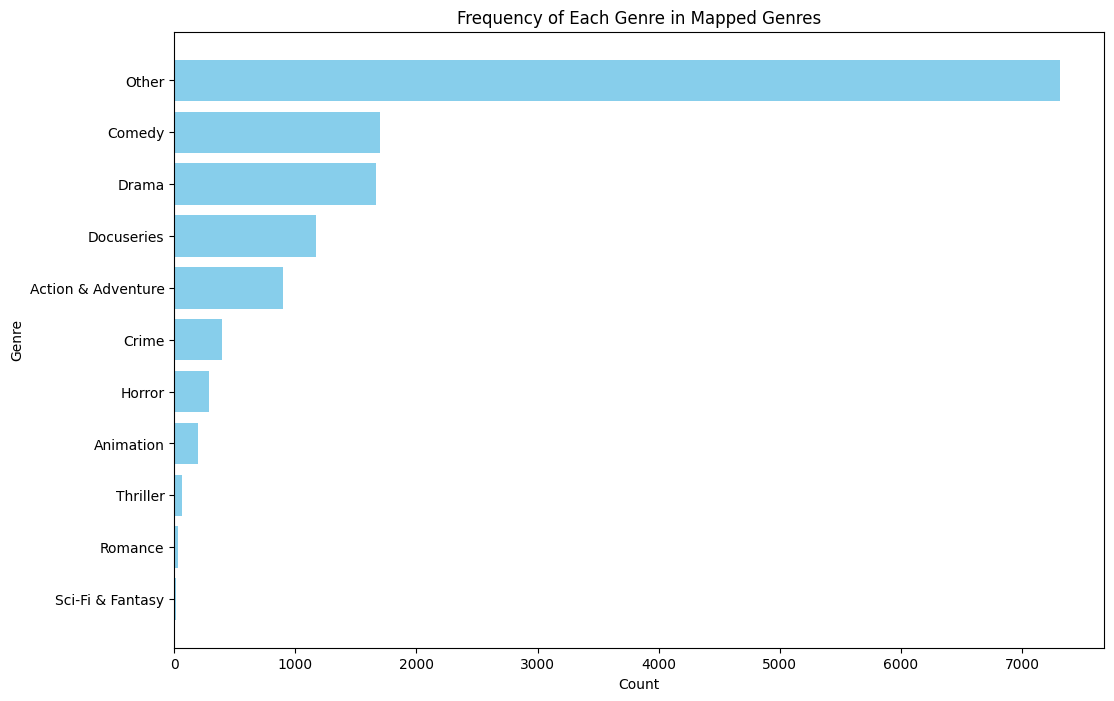

In [ ]:
plt.figure(figsize = (12, 8))
plt.barh(genre_counts_df['Genre'], genre_counts_df['Count'], color = 'skyblue')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Frequency of Each Genre in Mapped Genres')
plt.gca().invert_yaxis()
plt.show()

# Sadly, there is imbalanced data in the target column. Data imbalance, if not fix, can impact model's performance. Thus, I have to find a way to deal with 
# it.

In [ ]:
print(df.isnull().sum())

show_id             0
type                0
title               0
director         2634
cast              825
country           831
date_added         10
release_year        0
rating              4
duration            3
listed_in           0
description         0
mapped_genres       0
dtype: int64


In [7]:
df_one = df.copy()

# Fixing Missing Values

In [8]:
import itertools

def get_top_frequent_values(series, top_n = 3):
    """ Returns the top N frequent values in a pandas Series."""

    return series.value_counts().index[:top_n].tolist()

def rotating_imputer(series, top_values):
    """ Impute missing values in a pandas Series using rotating top frequent values."""

    # Create an iterator to rotate through the top values
    value_iterator = itertools.cycle(top_values)

    # Apply the iterator to fill missing values
    return series.apply(lambda x: next(value_iterator) if pd.isnull(x) else x)

def apply_rotating_imputation(df_one, columns, top_n = 3):
    """ Applies rotating frequent value imputation to specified columns in a dataframe."""

    df_imputed = df_one.copy()
    for column in columns:
        top_values = get_top_frequent_values(df_one[column], top_n = top_n)
        df_imputed[column] = rotating_imputer(df_one[column], top_values)

    return df_imputed

In [9]:
# Identify columns to impute:
columns_to_impute = ['cast', 'director', 'country', 'date_added', 'rating', 'duration']

# Apply rotating imputation:
df_imputed = apply_rotating_imputation(df_one, columns_to_impute, top_n = 2)
print(df_imputed.isna().sum())

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
mapped_genres    0
dtype: int64


# OneHotEncoding

In [10]:
df_encoded = pd.get_dummies(df_imputed, columns = ['type'], prefix = 'type')


In [11]:
!pip install category_encoders

# LeaveOneOutEncoder (LOOE)

In [12]:
import category_encoders as ce

mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(df_encoded['mapped_genres']) # Transform mapped_genres into binary format using MultiLabelBinarizer.

# Aggregate by summing up binary values:
df_encoded['target'] = genre_matrix.sum(axis = 1)

# Encoding "director" column:
encoder = ce.LeaveOneOutEncoder(cols = ['director'])
kf = KFold(n_splits = 5, shuffle = True, random_state = 0)
encoded_director = np.zeros(df_encoded.shape[0])

for train_index, test_index in kf.split(df_encoded):
    X_train, X_test = df_encoded.iloc[train_index], df_encoded.iloc[test_index]
    y_train, y_test = df_encoded['target'].iloc[train_index], df_encoded['target'].iloc[test_index]

    encoder.fit(X_train['director'], y_train)
    encoded_director[test_index] = encoder.transform(X_test['director'], y_test).values.ravel()

df_encoded['encoded_director'] = encoded_director

# Cleaning description Column

In [13]:
# Download NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean text
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation
    tokens = word_tokenize(text) # Tokenization
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words] # Removing stop words & lemmetization

    return ' '.join(cleaned_tokens)

# Apply the function to the description column
df_encoded['cleaned_description'] = df_encoded['description'].apply(clean_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# TF-IDF on description Column

In [14]:
# After cleaning, it's time to vectorize it. There are some known methods for vectorization such as word embeddings, BOW, TF-IDF and ...; I will go for 
# TF-IDF.

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_encoded['cleaned_description'])
tfidf_df_one = pd.DataFrame(tfidf_matrix.toarray(), columns = vectorizer.get_feature_names_out())

# Cleaning title Column

In [15]:
# Function to clean text

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    cleaned_tokens = [word for word in tokens if word not in stop_words]

    return cleaned_tokens

df_encoded['cleaned_title'] = df_encoded['title'].apply(clean_text)

# TF-IDF on title Column

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

df_encoded['cleaned_title'] = df_encoded['cleaned_title'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_encoded['cleaned_title'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns = vectorizer.get_feature_names_out())


# Data Science)
1- Predict the genre solely based on the plot summary and the title
2- After that, use only the cast & the directors

In [23]:
# Defining feature matrix:

type_columns = [col for col in df_encoded.columns if 'type' in col]
type_df = df_encoded[type_columns]

# Reset the index to ensure alignment during concatenation
type_df.reset_index(drop = True, inplace = True)
tfidf_df.reset_index(drop = True, inplace = True)
tfidf_df_one.reset_index(drop = True, inplace = True)

# Concatenate the one-hot-encoded columns with the TF-IDF matrix
X = pd.concat([type_df, tfidf_df, tfidf_df_one], axis = 1)

In [24]:
# Defining y vector:

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df_encoded['mapped_genres'])

In [25]:
# Splitting:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# LogisticRegression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score

model = OneVsRestClassifier(LogisticRegression(solver = 'liblinear', class_weight = 'balanced', max_iter = 1000))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"F1 Score: {f1_score(y_test, y_pred, average = 'micro')}")
print(f"Precision Score: {precision_score(y_test, y_pred, average = 'micro')}")
print(f"Recall Score: {recall_score(y_test, y_pred, average = 'micro')}")


F1 Score: 0.7633614627285513
Precision Score: 0.7396933560477001
Recall Score: 0.788594260806393


Now, it's time to build a model capable of predicting genre based on cast and director columns.

# Cleaning cast Column

In [17]:
# Function to clean text:

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    cleaned_tokens = [word for word in tokens if word not in stop_words]

    return cleaned_tokens

df_encoded['cleaned_cast'] = df_encoded['cast'].apply(clean_text)


# TF-IDF on cast Column

In [18]:
# Convert lists of tokens into strings
df_encoded['cleaned_cast'] = df_encoded['cleaned_cast'].apply(lambda x: ' '.join(x))

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_encoded['cleaned_cast'])

tfidf_df_two = pd.DataFrame(tfidf_matrix.toarray(), columns = vectorizer.get_feature_names_out())

In [21]:
# Defining Feature matrix:

type_columns = [col for col in df_encoded.columns if 'type' in col]
print("One-Hot Encoded type columns:", type_columns)

# Add 'encoded_director' to the type_columns list
type_columns.append('encoded_director')

# Extract the one-hot encoded 'type' columns and 'encoded_director' column
additional_features = df_encoded[type_columns]

tfidf_df_two.reset_index(drop = True, inplace = True)
additional_features.reset_index(drop = True, inplace = True)

# Combine the embeddings DataFrame with the additional features DataFrame
X1 = pd.concat([tfidf_df_two, additional_features], axis = 1)

One-Hot Encoded type columns: ['type_Movie', 'type_TV Show']


In [22]:
# Defining y vector:

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df_encoded['mapped_genres'])

In [23]:
# Splitting:

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2, random_state = 42)

# LogisticRegression

In [24]:
model_one = OneVsRestClassifier(LogisticRegression(solver = 'liblinear', class_weight = 'balanced', max_iter = 1000))
model_one.fit(X_train, y_train)
y_pred = model_one.predict(X_test)

print(f"F1 Score: {f1_score(y_test, y_pred, average = 'micro')}")
print(f"Precision Score: {precision_score(y_test, y_pred, average = 'micro')}")
print(f"Recall Score: {recall_score(y_test, y_pred, average = 'micro')}")

# It is discovered that predicting genre based on the director and cast columns leads to lower performance.

F1 Score: 0.6413112667091024
Precision Score: 0.5706598697252903
Recall Score: 0.7319288049400654
